# Visualizing dataset

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

### Our dataset contains different folders with threshold images of plate digit. Folders with names from 0-10 represent its self. Folders with names from 65 - 90 represents the ASCII value of Uppercase Alphabet letter  (A,B,C, etc)

In [22]:

#label_dataset = glob.glob("data/*")
label_dataset = glob.glob("dataset/*")

labels =[]

for label in label_dataset:
    labels.append(label[-1:])
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [24]:
y = np.asarray(labels)
#y = np.sort(y, axis=None)
y = y.reshape(-1,1)
print(y.shape)
y[:10]

(36, 1)


array([['0'],
       ['1'],
       ['2'],
       ['3'],
       ['4'],
       ['5'],
       ['6'],
       ['7'],
       ['8'],
       ['9']], dtype='<U1')

In [31]:
"dataset/%s/*.jpg"%(y[rand][0])

'dataset/L/*.jpg'

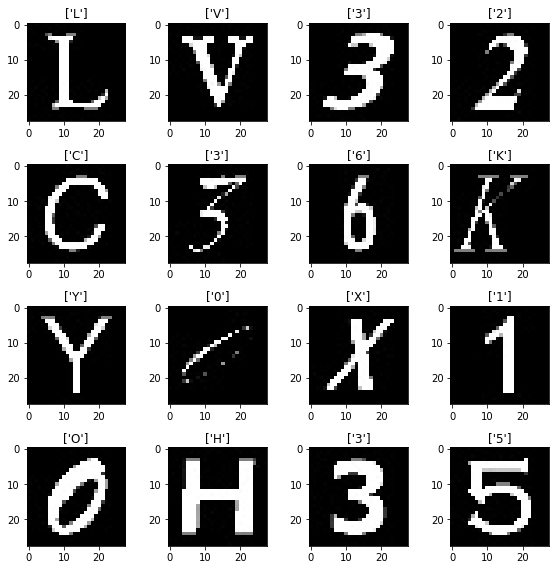

In [34]:
fig = plt.figure(figsize=(8,8))
cols = 4
rows = 4
fig_list = []

for i in range(1, cols*rows+1):
    rand = np.random.randint(len(y))
    #image_name = glob.glob("data/%i/*.jpg"%max(y[rand]))
    image_name = glob.glob("dataset/%s/*.jpg"%(y[rand][0]))
    rand_image = np.random.randint(len(image_name))
    fig_list.append(fig.add_subplot(rows,cols,i))
    fig_list[-1].set_title("%s"%y[rand])
    img = cv2.imread(image_name[rand_image],0)
    plt.imshow(img, cmap="gray")

plt.tight_layout(True)
plt.show()

# Preprocessing

In [36]:
digit_w = 30
digit_h = 60

input_data = []
output_data = []

for i in range(len(y)):
    #image_path =glob.glob("data/%i/*.jpg"%y[i])
    image_path =glob.glob("dataset/%s/*.jpg"%y[i])
    for image in image_path:
        img = cv2.imread(image,0)
        img = cv2.resize(img,(digit_w,digit_h))
        img = np.array(img)
        img = img.reshape(-1, digit_h * digit_w)
        input_data.append(img)
        output_data.append(y[i])

input_data = np.array(input_data).astype(np.float32)
input_data =input_data.reshape(-1,digit_w*digit_h)
output_data = np.array(output_data)
output_data =output_data.reshape(-1,1)

print(input_data.shape)
print(output_data.shape)



(36576, 1800)
(36576, 1)


# Create a SVC model and train with pre-processed dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc_model = GridSearchCV(SVC(), parameters)

svc_model.fit(input_data,output_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

# Evaluate the model

In [253]:
from sklearn.metrics import classification_report
pred = svc_model.predict(input_data)
print(classification_report(output_data,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        41
          65       1.00      1.00      1.00        18
          66       1.00      1.00      1.00        54
          67       1.00      1.00      1.00        36
          68       1.00      1.00      1.00        52
          69       1.00      1.00      1.00        48
          70       1.00      1.00      1.00        12
          71       1.00      1.00      1.00        21
          72       1.00    

In [254]:
pred[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3])

# Test model

In [2]:
def pre_process(image):
    import numpy as np
    import cv2
    
    img = cv2.resize(image,(30,60))
    img = np.asarray(img,dtype=np.float32)
    #print(img.shape)
    img = img[np.newaxis,:].reshape(-1,60*30)
    #print(img.shape)
    return img


array([69])

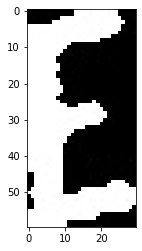

In [255]:
test_image = cv2.imread("data/69/193772_1.jpg",0)
plt.imshow(test_image,cmap="gray")


image = pre_process(test_image)
svc_model.predict(image)


array([6])

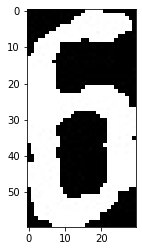

In [256]:
test_image = cv2.imread("data/6/46328_3.jpg",0)
plt.imshow(test_image,cmap="gray")


image = pre_process(test_image)
svc_model.predict(image)


[8]


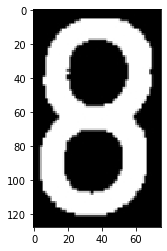

In [268]:
three_image = cv2.imread("test/8_test.jpg",0)
plt.imshow(three_image,cmap="gray")

img = pre_process(three_image)
print(svc_model.predict(img))

[70]


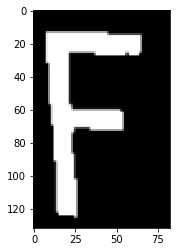

In [267]:
three_image = cv2.imread("test/f_test.jpg",0)
plt.imshow(three_image,cmap="gray")

img = pre_process(three_image)
print(svc_model.predict(img))

[2]


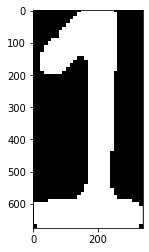

In [10]:
one_image = cv2.imread("test/one_test.jpg",0)
plt.imshow(one_image,cmap="gray")

img = pre_process(one_image)
print(svc_model.predict(img))

# Save model

In [258]:
from sklearn.externals import joblib
joblib.dump(svc_model,"svc_digit_recognition.joblib")

['svc_digit_recognition.joblib']

In [7]:
from sklearn.externals import joblib
svc_model = joblib.load("svc_digit_recognition.joblib")

# The end!